# Problem 1

**Scipy:** 
 
We have the min and max temperatures in a city In India for each months of the year. We would like to find a function to describe this and show it graphically, the dataset given below. 
 
**Task:** 
 
1. fitting it to the periodic function 
 
2. plot the fit 
 
**Data:** 
 
Max = 39, 41, 43, 47, 49, 51, 45, 38, 37, 29, 27, 25 
 
Min = 21, 23, 27, 28, 32, 35, 31, 28, 21, 19, 17, 18 

In [1]:
#Import standard python modules
import numpy as np                        # Numpy Module
import pandas as pd                       # Pandas Module
import matplotlib.pyplot as plt           # Matplotlib Module
import scipy.optimize as scipy_optimize   # Scipy Module

In [2]:
Max = [39, 41, 43, 47, 49, 51, 45, 38, 37, 29, 27, 25]
Min = [21, 23, 27, 28, 32, 35, 31, 28, 21, 19, 17, 18]

In [3]:
# Converting into numpy array
temp_max = np.array(Max)
temp_min = np.array(Min)

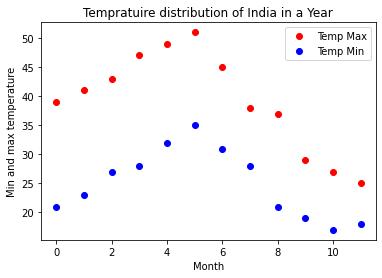

In [5]:
months = np.arange(12)
plt.plot(months , temp_max ,'ro',label ="Temp Max")
plt.plot(months , temp_min ,'bo',label ="Temp Min")
plt.title("Tempratuire distribution of India in a Year")
plt.xlabel('Month')
plt.ylabel('Min and max temperature')
plt.legend()
plt.show()

### Taske
1. Fitting it to the periodic function

In [6]:
# Create function
def yearly_temp_dist(times, avg, ampl, time_offset):
    return (avg + ampl * np.cos((times + time_offset) * 2 * np.pi / times.max()))

In [7]:
# Function execution and using scipy.optimize to fit data into curve 
popt_max, pcov_max = scipy_optimize.curve_fit(yearly_temp_dist, months,temp_max, [20, 10, 0])
popt_min, pcov_min = scipy_optimize.curve_fit(yearly_temp_dist, months,temp_min, [-40, 20, 0])

In [8]:
# Note Scipy.optimize.curve_fit returns 
print("Data for Max Temp\n")
print(popt_max, "\n")
print(pcov_max)
print("\nData for Min Temp\n")
print(popt_min,"\n")
print(pcov_min)

Data for Max Temp

[ 39.88861734 -10.59083166   1.33370154] 

[[ 1.28972692 -0.14357418 -0.02263924]
 [-0.14357418  2.57009611 -0.03276299]
 [-0.02263924 -0.03276299  0.07074015]]

Data for Min Temp

[25.55626462 -7.74472962  0.93101294] 

[[ 0.19941393 -0.02644226 -0.00351662]
 [-0.02644226  0.38392582 -0.00606194]
 [-0.00351662 -0.00606194  0.02114122]]


2.  plot the fit

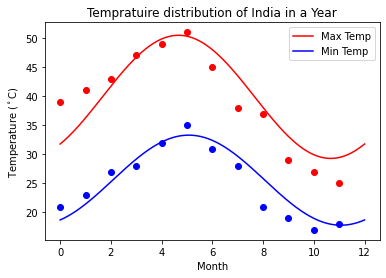

In [9]:
days = np.linspace(0, 12, num=365)

#plot the data
plt.plot(months, temp_max, 'ro')
plt.plot(days, yearly_temp_dist(days, *popt_max),'r-', label='Max Temp')
plt.plot(months, temp_min, 'bo')
plt.plot(days, yearly_temp_dist(days, *popt_min),'b-', label='Min Temp')
plt.title("Tempratuire distribution of India in a Year")
plt.xlabel('Month')
plt.ylabel('Temperature ($^\circ$C)')
plt.legend()
plt.show()

# Problem 2

**Matplotlib:** 
 
This assignment is for visualization using matplotlib: 
 
**data to use:** 
 
url=https://raw.githubusercontent.com/Geoyi/Cleaning-Titanic-Data/master/titanic_original.csv 
 
titanic = pd.read_csv(url) 
 
**Charts to plot:** 
 
1. Create a pie chart presenting the male/female proportion 
 
2. Create a scatterplot with the Fare paid and the Age, differ the plot color by gender 

In [11]:
url="https://raw.githubusercontent.com/Geoyi/Cleaning-Titanic-Data/master/titanic_original.csv"
titanic = pd.read_csv(url)

In [12]:
titanic.head()

,pclass,survived,name,sex,age,sibsp,parch,ticket,fare,cabin,embarked,boat,body,home.dest
0,1.0,1.0,"Allen, Miss. Elisabeth Walton",female,29.0000,0.0,0.0,24160,211.3375,B5,S,2,NaN,"St Louis, MO"
1,1.0,1.0,"Allison, Master. Hudson Trevor",male,0.9167,1.0,2.0,113781,151.5500,C22 C26,S,11,NaN,"Montreal, PQ / Chesterville, ON"
2,1.0,0.0,"Allison, Miss. Helen Loraine",female,2.0000,1.0,2.0,113781,151.5500,C22 C26,S,NaN,NaN,"Montreal, PQ / Chesterville, ON"
3,1.0,0.0,"Allison, Mr. Hudson Joshua Creighton",male,30.0000,1.0,2.0,113781,151.5500,C22 C26,S,NaN,135.0,"Montreal, PQ / Chesterville, ON"
4,1.0,0.0,"Allison, Mrs. Hudson J C (Bessie Waldo Daniels)",female,25.0000,1.0,2.0,113781,151.5500,C22 C26,S,NaN,NaN,"Montreal, PQ / Chesterville, ON"


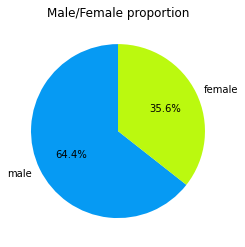

In [19]:
#1. Create a pie chart presenting the male/female proportion

count=titanic['sex'].value_counts()
colors=['xkcd:azure','xkcd:yellowgreen']
plt.pie(count.values.tolist(), labels=count.index.values.tolist(), colors=colors,startangle=90,autopct='%.1f%%')
plt.title('Male/Female proportion')
plt.show()

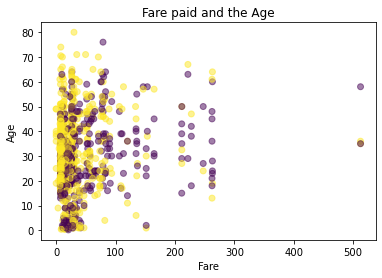

In [27]:
#2. Create a scatterplot with the Fare paid and the Age, differ the plot color by gender

plt.scatter(titanic['fare'], titanic['age'], c= pd.factorize(titanic['sex'])[0], alpha=0.5)
plt.xlabel('Fare')
plt.ylabel('Age')
plt.title('Fare paid and the Age')
plt.show()